### Example 22 - Tapered Shaft

##### This example is based on Example 5.9.10 page 237 from [Friswell, 2010]. 

Consider a tapered shaft of length 1.5 m and a diameter that changes linearly from 25 to 40 mm. A disk of diameter 250 mm and thickness 40 mm is placed at the center of the shaft, and short bearings of stiffness 10 MN/m and damping 1 kNs/m are attached at the ends of the shaft. The Young’s modulus and mass density are 211 GN/mz and 7,810 kg/m3, respectively. Estimate the first pair of natural frequencies of this machine at 3,000 rev/min using a stepped shaft diameter and elements of uniform diameter and by using tapered elements.

In [1]:
import ross as rs
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import display
import math
pi = math.pi

In [2]:
Q_ = rs.Q_

In [3]:
steel = rs.Material("steel", E=211e9, G_s=81.2e9, rho=7810)

In [4]:
L_width = 1.5
idl = 0
idr = 0
odl = 0.025
major_diameter = 0.040
minor_diameter = 0.025
increment_odr = major_diameter - minor_diameter

#### Defining bearings, shaft and disk elments in function of nodes or number of shaft elements(N)

In [5]:
# Tapered (Conical) shaft element
def shaft_tap(N):
    shaft_tap = [rs.ShaftElement(
    L=L_width/N,
    idl=idl,
    idr=idr,
    odl=odl+(i)*increment_odr/N,
    odr=(i+1)*increment_odr/N+odl,
    material=steel,
    shear_effects=True,
    rotary_inertia=True,
    gyroscopic=True,
    ) for i in range(N)]
    return shaft_tap

# Cylindrical shaft element (the element diameter is assumed as the average diameter of odr and odl)
def shaft_cyl(N):
    shaft_cyl = [rs.ShaftElement(L=L_width/N, idl=idl, odl=odl+increment_odr/(2*N)+(i)*increment_odr/N, material=steel) for i in range(N)]
    return shaft_cyl

In [6]:
def bearings(N):
    bearings = [
    rs.BearingElement(n=0, kxx=1e10, cxx=1e3, scale_factor=4),
    rs.BearingElement(n=N, kxx=1e10, cxx=1e3, scale_factor=4),
]
    return bearings

def disks(N):
    disks = [
    rs.DiskElement.from_geometry(
        n=N/2, material=steel, width=0.040, i_d=odl+(increment_odr*1/2), o_d=0.250, scale_factor="mass"
    ),
]
    return disks


#rotor = rs.Rotor(shaft_elements=shaft, disk_elements=disks, bearing_elements=bearings)
#rotor.plot_rotor()

#### Estimate the first pair of damped natural frequencies of this machine at 3,000 rev/min using a stepped shaft diameter and elements of uniform diameter and by using tapered elements.

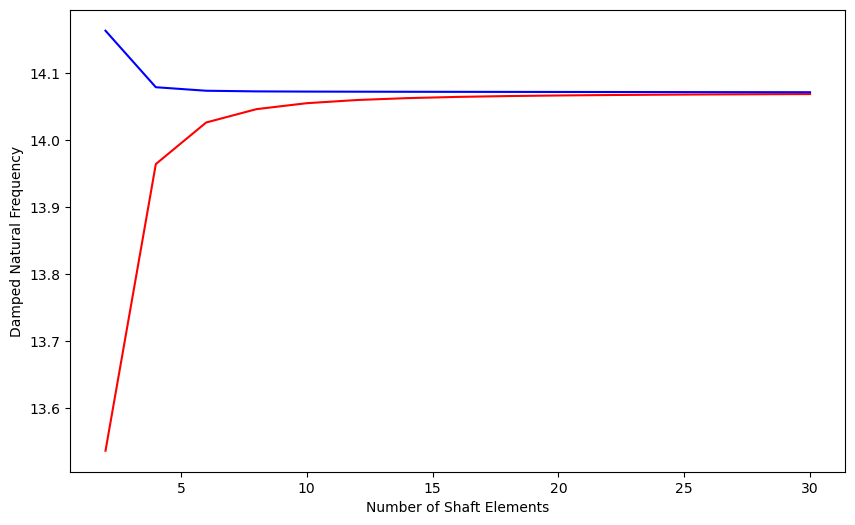

In [8]:
# building a vector to set the number of shaft elements
qtd_nos_max = 30
qtd_nos = np.linspace(2, qtd_nos_max, (qtd_nos_max//2), dtype=int )
wd_list_cyl = []
for elem in qtd_nos:
    A = shaft_cyl(elem)
    B = bearings(elem)
    C = disks(elem)
    rotor_cyl = rs.Rotor(shaft_elements = A, disk_elements = C, bearing_elements = B)
    rotor_cyl.plot_rotor()
    modal_cyl = rotor_cyl.run_modal(speed=Q_(3000, "RPM"))
    wd_cyl = modal_cyl.wd
    wd_list_cyl.append(wd_cyl)
wd_list_cyl = np.array(wd_list_cyl)/(2*pi)   # changing from rad/s to Hz
wd_list_1st_cyl = wd_list_cyl.T[0,:]

wd_list_tap = []
for elem in qtd_nos:
    A = shaft_tap(elem)
    B = bearings(elem)
    C = disks(elem)
    rotor_tap = rs.Rotor(shaft_elements = A, disk_elements = C, bearing_elements = B)
    rotor_tap.plot_rotor()
    modal_tap = rotor_tap.run_modal(speed=Q_(3000, "RPM"))
    wd_tap = modal_tap.wd
    wd_list_tap.append(wd_tap)
wd_list_tap = np.array(wd_list_tap)/(2*pi)  # changing from rad/s to Hz
wd_list_1st_tap = wd_list_tap.T[0,:]

plt.figure(figsize=(10, 6))
plt.plot(qtd_nos, wd_list_1st_cyl,c='r', linestyle='-')
plt.plot(qtd_nos, wd_list_1st_tap,c='b', linestyle='-')
plt.xlabel('Number of Shaft Elements')
plt.ylabel('First pair of Damped Natural Frequency')
plt.show()
    

#### Estimate the Second pair of Damped Natural frequencies of this machine at 3,000 rev/min using a stepped shaft diameter and elements of uniform diameter and by using tapered elements.

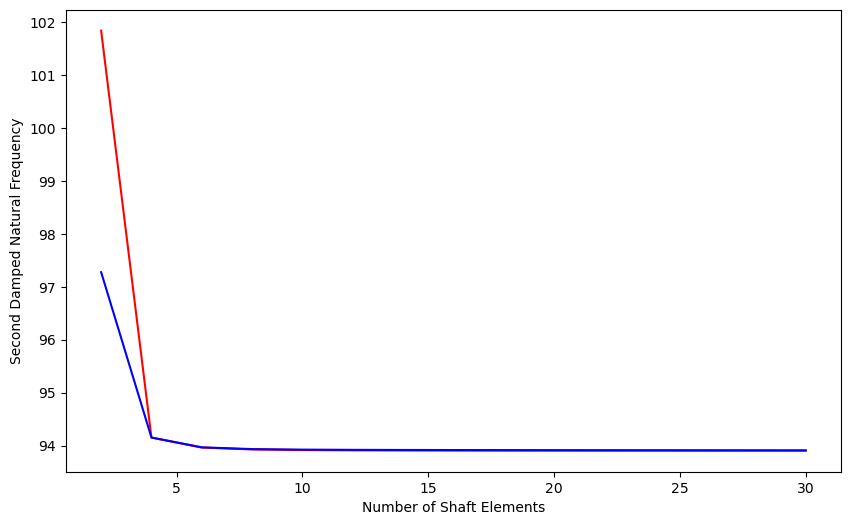

In [9]:
# building a vector to set the number of shaft elements
qtd_nos_max = 30 # should be even number
qtd_nos = np.linspace(2, qtd_nos_max, (qtd_nos_max//2), dtype=int )
wd_list_cyl = []
for elem in qtd_nos:
    A = shaft_cyl(elem)
    B = bearings(elem)
    C = disks(elem)
    rotor_cyl = rs.Rotor(shaft_elements = A, disk_elements = C, bearing_elements = B)
    rotor_cyl.plot_rotor()
    modal_cyl = rotor_cyl.run_modal(speed=Q_(3000, "RPM"))
    wd_cyl = modal_cyl.wd
    wd_list_cyl.append(wd_cyl)
wd_list_cyl = np.array(wd_list_cyl)/(2*pi)   # changing from rad/s to Hz
wd_list_1st_cyl = wd_list_cyl.T[2,:]      # Second pair of natural frequencies

wd_list_tap = []
for elem in qtd_nos:
    A = shaft_tap(elem)
    B = bearings(elem)
    C = disks(elem)
    rotor_tap = rs.Rotor(shaft_elements = A, disk_elements = C, bearing_elements = B)
    rotor_tap.plot_rotor()
    modal_tap = rotor_tap.run_modal(speed=Q_(3000, "RPM"))
    wd_tap = modal_tap.wd
    wd_list_tap.append(wd_tap)
wd_list_tap = np.array(wd_list_tap)/(2*pi)   # changing from rad/s to Hz
wd_list_1st_tap = wd_list_tap.T[2,:]      #Second pair of natural frequencies

plt.figure(figsize=(10, 6))
plt.plot(qtd_nos, wd_list_1st_cyl,c='r', linestyle='-')
plt.plot(qtd_nos, wd_list_1st_tap,c='b', linestyle='-')
plt.xlabel('Number of Shaft Elements')
plt.ylabel('Second pair of Damped Natural Frequency')
plt.show()